# Time Series Analysis of videos

### Import Libraries and Data

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [55]:
# File name represents most recent update
file = r'/Users/OliverPan/Desktop/youtube_data/trend_12-03-20.csv'

In [56]:
trends = pd.read_csv(file)

In [57]:
# Change format
trends['trending_date'] = trends['trending_date'].str[0:10]
trends['trending_date'] = pd.to_datetime(trends['trending_date'])

In [58]:
trends.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,KX06ksuS6Xo,Diljit Dosanjh: CLASH (Official) Music Video |...,2020-08-11T07:30:02Z,UCZRdNleCgW-BGUJf-bbjzQg,Diljit Dosanjh,10,2020-08-12,clash diljit dosanjh|diljit dosanjh|diljit dos...,9140911,296541,6180,30059,https://i.ytimg.com/vi/KX06ksuS6Xo/default.jpg,False,False,CLASH official music video performed by DILJIT...
1,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353797,2628,40222,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
2,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12,Apex Legends|Apex Legends characters|new Apex ...,2381688,146740,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
3,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156914,5857,35331,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45803,964,2198,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...


In [59]:
trends = trends[['trending_date', 'view_count', 'likes', 'dislikes', 'comment_count']]

### Number of Likes and Views on trending videos

Text(0.5, 1.0, 'View Count per day')

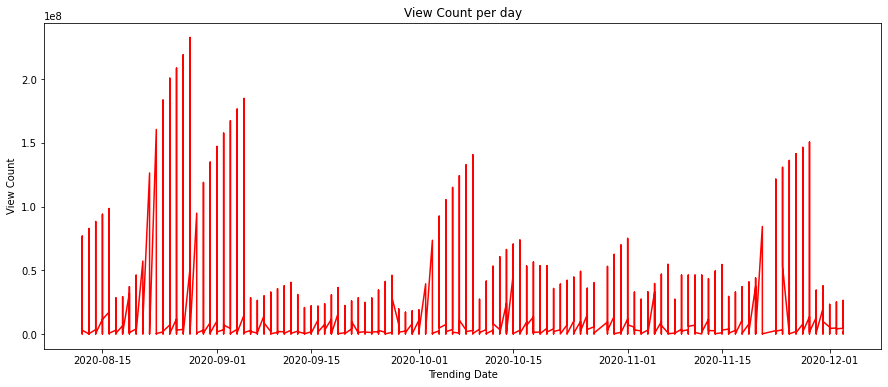

In [60]:
plt.figure(figsize=[15, 6])
plt.plot(trends['trending_date'], trends['view_count'], label = "v", color = 'r')
plt.xlabel('Trending Date')
plt.ylabel('View Count')
plt.title('View Count per day')

We see that the data doesn't exactly look too good, so we can group data by date and average the counts for a clearer interpretation of the data

In [61]:
trends_view_count = trends.groupby(trends['trending_date'])['view_count'].mean().to_frame().reset_index()
trends_likes = trends.groupby(trends['trending_date'])['likes'].mean().to_frame().reset_index()

Text(0.5, 1.0, 'View Count per day')

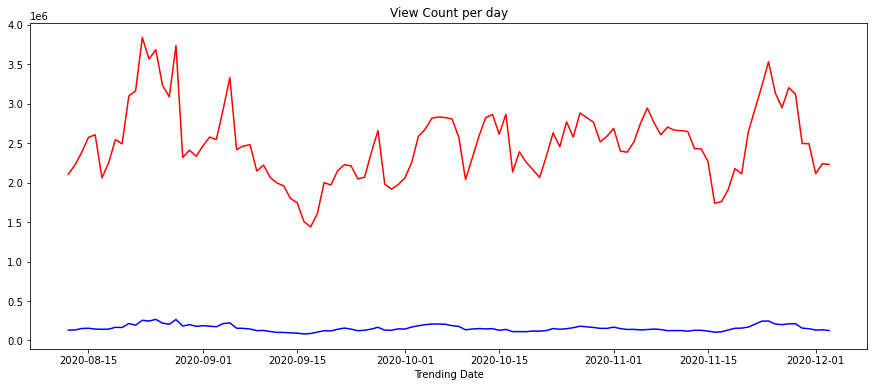

In [62]:
plt.figure(figsize=[15, 6])
plt.plot(trends_view_count['trending_date'], trends_view_count['view_count'], label = "v", color = 'r')
plt.plot(trends_likes['trending_date'], trends_likes['likes'], label = "v", color = 'blue')
plt.xlabel('Trending Date')
plt.title('View Count per day')

### Number of trending videos per day

In [63]:
number_trending = trends.groupby(trends['trending_date'])['view_count'].count().to_frame().reset_index()

Text(0.5, 1.0, 'Number of trending videos that per day')

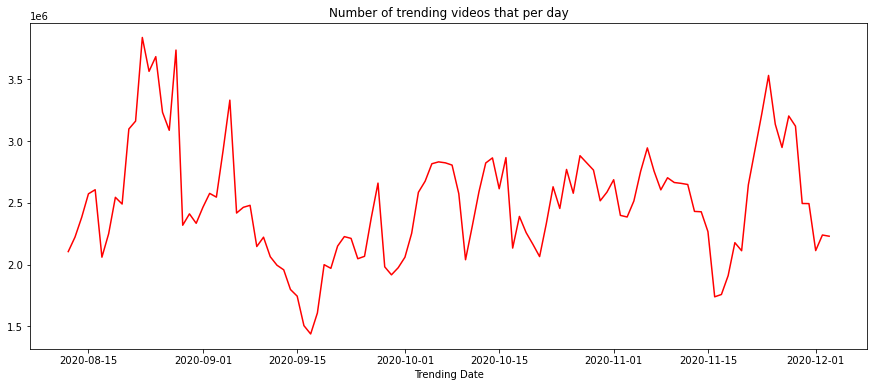

In [64]:
plt.figure(figsize=[15, 6])
plt.plot(number_trending['trending_date'], trends_view_count['view_count'], label = "v", color = 'r')
plt.xlabel('Trending Date')
plt.title('Number of trending videos that per day')

We learn here that there is no set number of trending videos that youtube produces. Instead, we can understand that there are variables and characteristics that make videos trending.

### FBProphet

In [65]:
from fbprophet import Prophet

In [66]:
# Average number of views on videos, per trending date
trends_view_count

,trending_date,view_count
0,2020-08-12,2105358.400
1,2020-08-13,2222241.605
2,2020-08-14,2383084.105
3,2020-08-15,2573068.600
4,2020-08-16,2606181.550
...,...,...
107,2020-11-29,2494725.275
108,2020-11-30,2493782.155
109,2020-12-01,2113557.430
110,2020-12-02,2239695.565


In [67]:
trends_view_count.columns = ['ds', 'y']

In [68]:
model = Prophet()
model.fit(trends_view_count)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [69]:
# This is when the model will predict until
future_predictions = model.make_future_dataframe(periods=90)
future_predictions.tail()

,ds
197,2021-02-27
198,2021-02-28
199,2021-03-01
200,2021-03-02
201,2021-03-03


In [70]:
forecast = model.predict(future_predictions)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
197,2021-02-27,2.632125e+06,2.024452e+06,3.230741e+06
198,2021-02-28,2.639737e+06,2.038243e+06,3.241008e+06
199,2021-03-01,2.547574e+06,1.960379e+06,3.143058e+06
200,2021-03-02,2.595291e+06,2.001854e+06,3.186056e+06
201,2021-03-03,2.510829e+06,1.891861e+06,3.107940e+06


Text(0.5, 1.0, 'Predicting average views per trending date in early 2021')

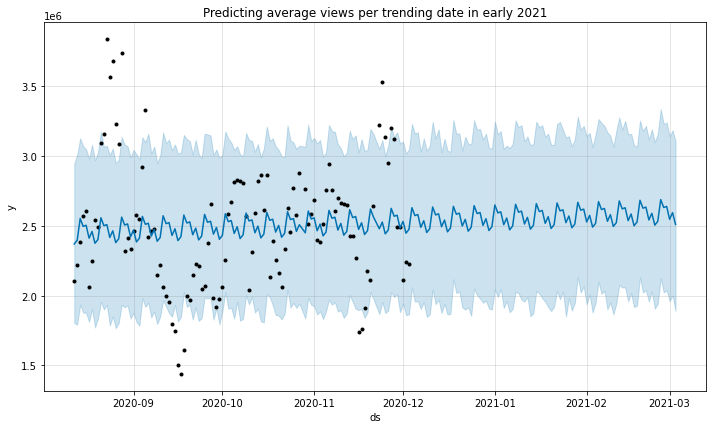

In [71]:
prediction_visual = model.plot(forecast)
plt.title('Predicting average views per trending date in early 2021')

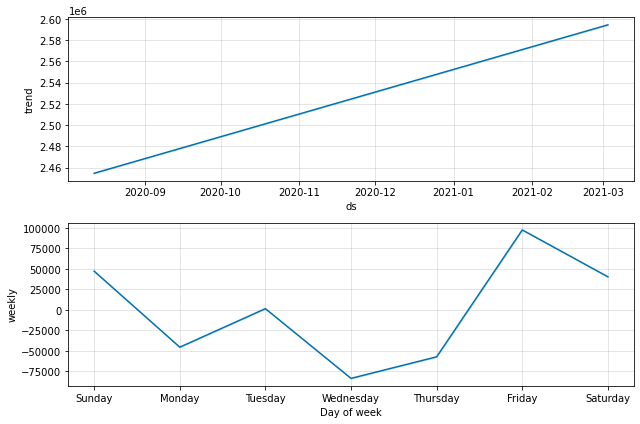

In [72]:
model.plot_components(forecast);

It looks like FBProphet is not training properly on the anomalies and large spikes.

This weekly seasonality is quite interesting because it looks like Friday generates the highest count for trending videos, hence posting a couple days prior can be strategic.